In [1]:
pip install tensorflow matplotlib pillow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!ls /content/drive/MyDrive/dataset-civiltà-contadina

CivContadina_serie1  CivContadina_serie2  CivContadina_serie3


1/1 [==============================] - 0s 190ms/step


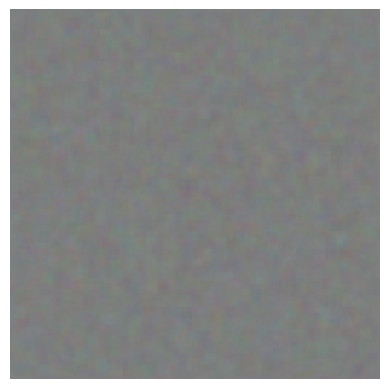

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carica l'immagine di input
input_image_path = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/197.JPG'
img = Image.open(input_image_path)
img = img.convert('RGB')
img = img.resize((128, 128))  # Ridimensiona l'immagine per l'addestramento della GAN

# Normalizza l'immagine per l'addestramento della GAN
img_array = np.array(img)
img_array = (img_array.astype(np.float32) - 127.5) / 127.5

# Definizione del generatore della GAN
def build_generator():
    model = Sequential()

    model.add(Dense(128 * 32 * 32, activation="relu", input_dim=100))
    model.add(Reshape((32, 32, 128)))
    model.add(UpSampling2D())

    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())

    model.add(Conv2D(3, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))

    return model

# Costruisci e compila il modello del generatore
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Addestramento della GAN (in questo esempio, l'addestramento è semplificato)
noise = np.random.normal(0, 1, (1, 100))
generated_image = generator.predict(noise)

# Denormalizza l'immagine generata per la visualizzazione
generated_image = (generated_image + 1) * 127.5
generated_image = generated_image.astype(np.uint8)

# Visualizza l'immagine generata
plt.imshow(generated_image[0])
plt.axis('off')
plt.show()

#risultato molto deludente


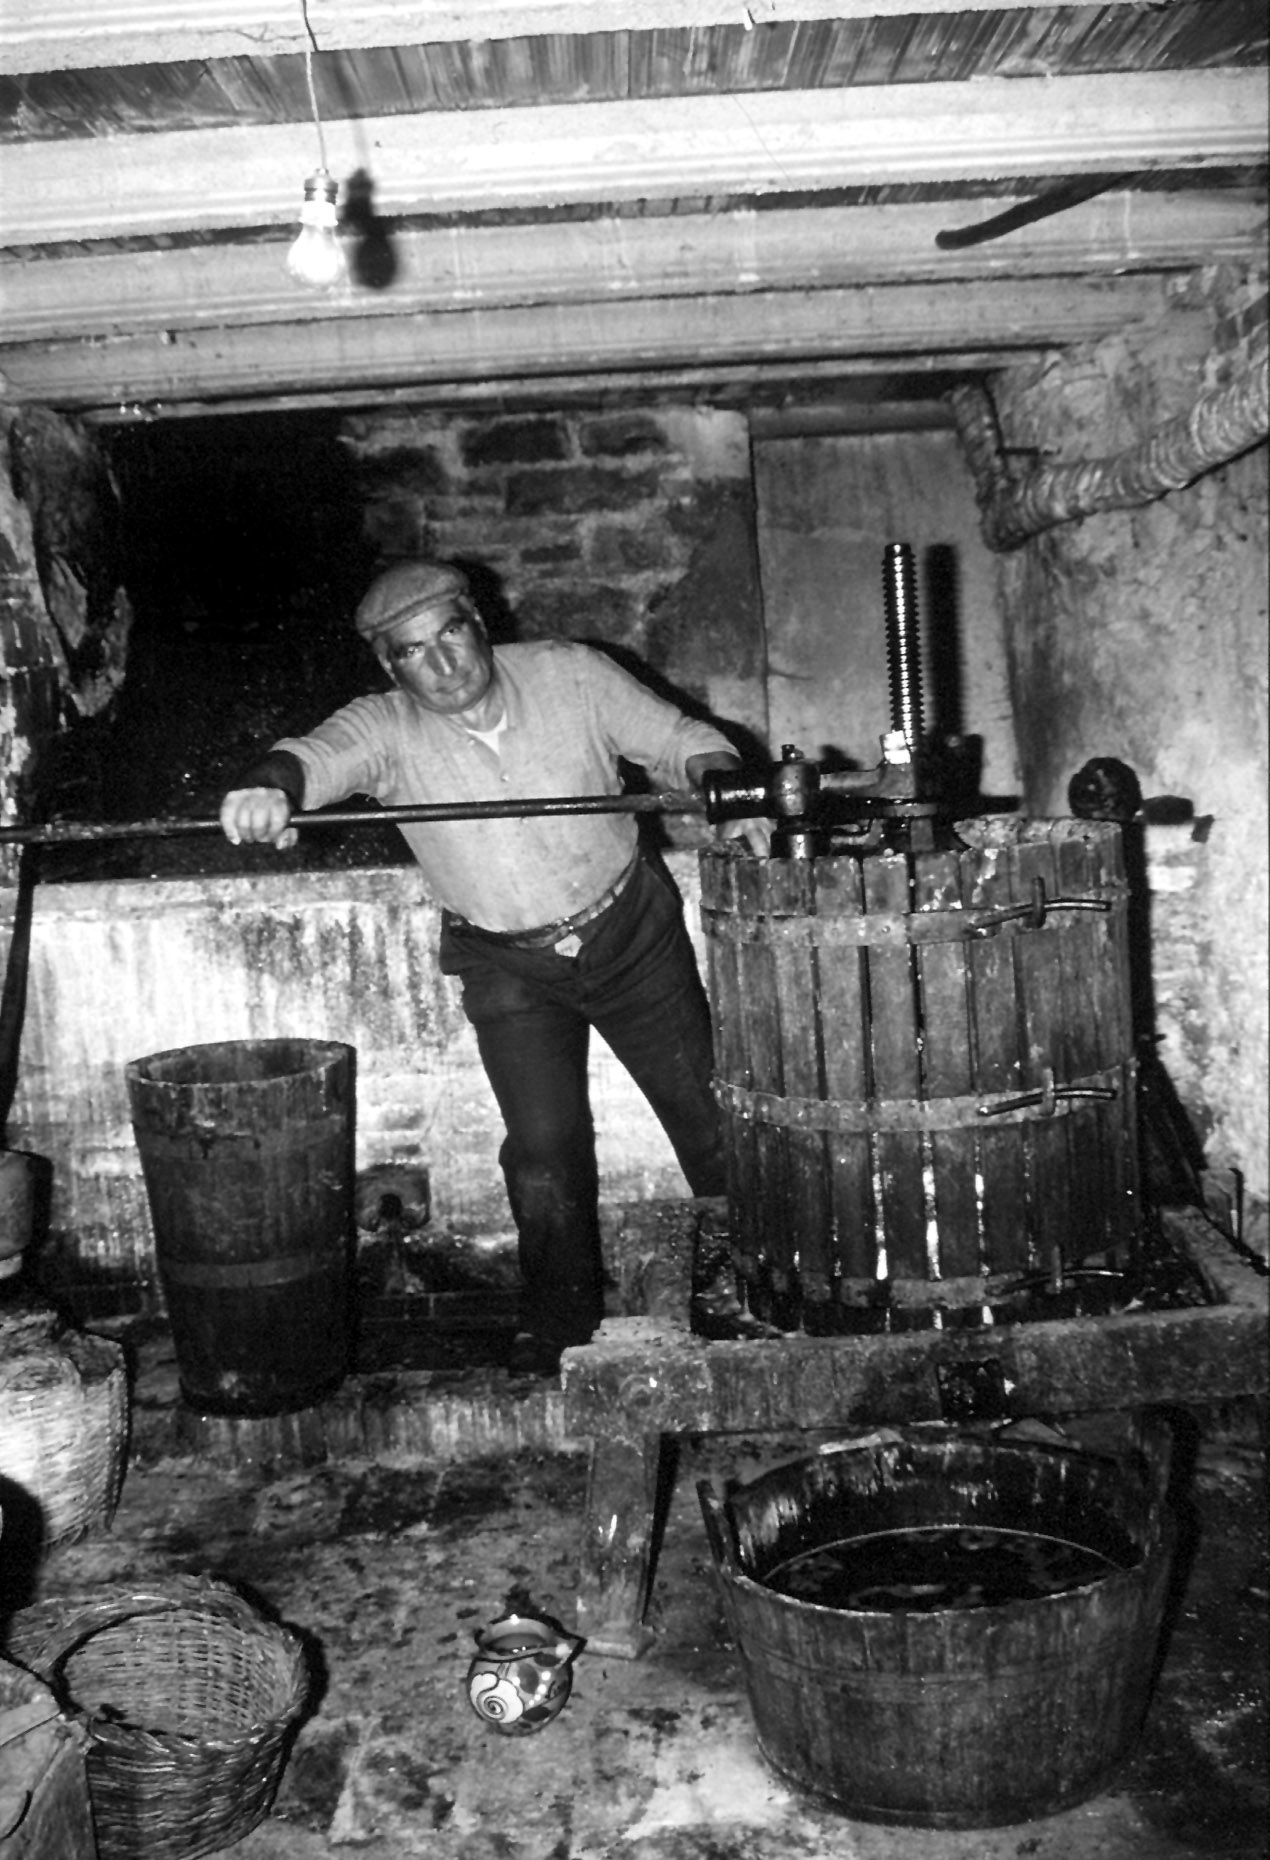

In [18]:
# Carica l'immagine di input
input_image_path = '/content/drive/MyDrive/dataset-civiltà-contadina/CivContadina_serie2/197.JPG'
img = Image.open(input_image_path)
img